# Artificial Neural Network Regression

### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
tf.__version__

'2.7.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [6]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


array([[<AxesSubplot:xlabel='AT', ylabel='AT'>,
        <AxesSubplot:xlabel='V', ylabel='AT'>,
        <AxesSubplot:xlabel='AP', ylabel='AT'>,
        <AxesSubplot:xlabel='RH', ylabel='AT'>,
        <AxesSubplot:xlabel='PE', ylabel='AT'>],
       [<AxesSubplot:xlabel='AT', ylabel='V'>,
        <AxesSubplot:xlabel='V', ylabel='V'>,
        <AxesSubplot:xlabel='AP', ylabel='V'>,
        <AxesSubplot:xlabel='RH', ylabel='V'>,
        <AxesSubplot:xlabel='PE', ylabel='V'>],
       [<AxesSubplot:xlabel='AT', ylabel='AP'>,
        <AxesSubplot:xlabel='V', ylabel='AP'>,
        <AxesSubplot:xlabel='AP', ylabel='AP'>,
        <AxesSubplot:xlabel='RH', ylabel='AP'>,
        <AxesSubplot:xlabel='PE', ylabel='AP'>],
       [<AxesSubplot:xlabel='AT', ylabel='RH'>,
        <AxesSubplot:xlabel='V', ylabel='RH'>,
        <AxesSubplot:xlabel='AP', ylabel='RH'>,
        <AxesSubplot:xlabel='RH', ylabel='RH'>,
        <AxesSubplot:xlabel='PE', ylabel='RH'>],
       [<AxesSubplot:xlabel='AT', ylabel='PE'

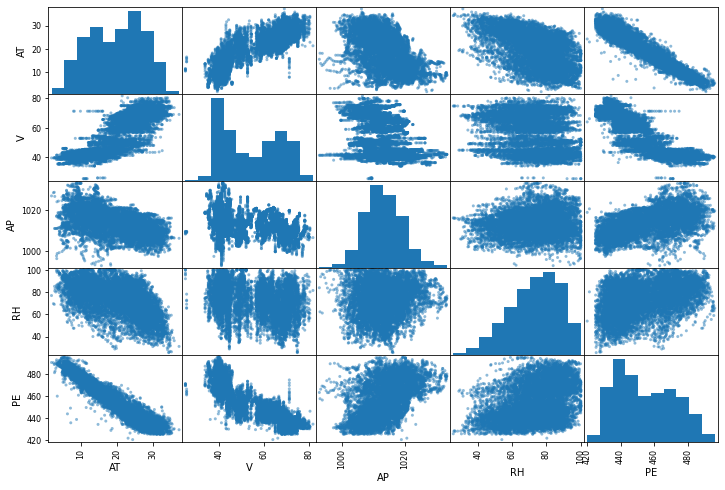

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["AT", "V", "AP","RH","PE"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

### Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [13]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [14]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 [==============================] - 2s 1ms/step - loss: 80224.4453
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 279.0814
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 253.0691
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 159.0647
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 90.8571
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 50.2831
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 37.6472
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 35.3365
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 34.5096
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 33.1593
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 32.6794
Epoch 12/100
240/240 [==============================] - 0s 1ms/step - loss: 31.

240/240 [==============================] - 0s 1ms/step - loss: 27.7634
Epoch 99/100
240/240 [==============================] - 0s 1ms/step - loss: 27.4750
Epoch 100/100
240/240 [==============================] - 0s 1ms/step - loss: 27.5874


In [55]:
import keras
from matplotlib import pyplot as plt

Text(0.5, 0, 'epoch')

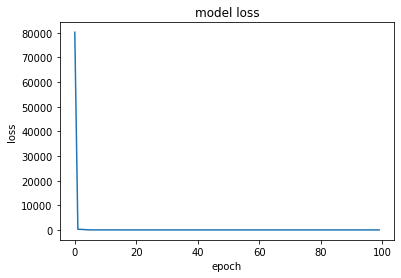

In [18]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper right')
#plt.show()

### Predicting the results of the Test set

In [19]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[429.84 431.23]
 [460.96 460.01]
 [464.49 461.14]
 ...
 [471.7  473.26]
 [438.52 438.  ]
 [457.75 463.28]]


In [20]:
y_pred[0][0]

429.84296

In [21]:
ypred = [i[0] for i in y_pred]

In [22]:
y_test[0]

431.23

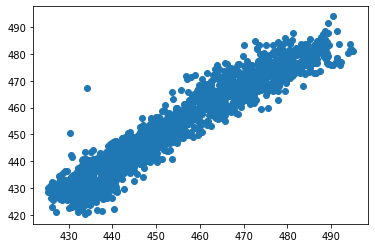

In [23]:
plt.plot(y_test,y_pred,'o')

In [63]:
from scipy import stats

In [172]:
x = y_test
y = [i[0] for i in y_pred]

In [73]:
fit_pred = stats.linregress(x, y)
print(f"R-squared: {fit_pred.rvalue**2:.6f}")

R-squared: 0.916345


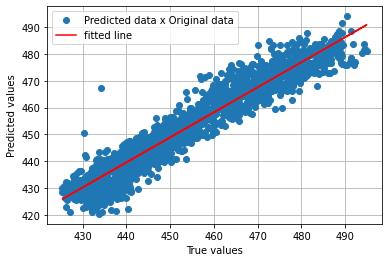

In [82]:
plt.plot(x, y, 'o', label='Predicted data x Original data')
plt.plot(x, fit_pred.intercept + fit_pred.slope*x, 'r', label='fitted line')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

Band with 95% of the points. 

In [78]:
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))

In [161]:
ts = tinv(0.05, len(x)-2)
print(f"slope (95%): {fit_pred.slope:.6f} +/- {ts*fit_pred.stderr:.6f}")
print(f"intercept (95%): {fit_pred.intercept:.6f}"
      f" +/- {ts*fit_pred.intercept_stderr:.6f}")

slope (95%): 0.931462 +/- 0.012623
intercept (95%): 29.764164 +/- 5.742616


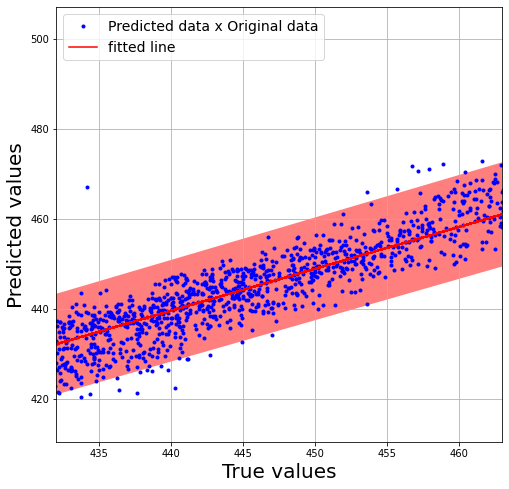

In [181]:
error_up = (fit_pred.intercept + ts*fit_pred.intercept_stderr) + (fit_pred.slope + ts*fit_pred.stderr) * x
error_down = (fit_pred.intercept - ts*fit_pred.intercept_stderr) + (fit_pred.slope - ts*fit_pred.stderr) * x

plt.figure(figsize=(8,8))
plt.plot(x, y, 'o', markersize=3.0,color='blue',label='Predicted data x Original data')
plt.plot(x, fit_pred.intercept + fit_pred.slope*x, 'r', label='fitted line')
plt.xlim(432,463)
plt.fill_between(x, error_up, error_down,alpha=0.5,color='r',linewidth=0)
plt.xlabel('True values',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.legend(loc='upper left',fontsize=14)
plt.grid(True)
plt.show()

# SHAP

### You've seen (and used) techniques to extract general insights from a machine learning model. But what if you want to break down how the model works for an individual prediction?

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.

In [24]:
import numpy as np
import shap

In [25]:
explainer = shap.KernelExplainer(ann.predict,X_train[:100])

In [26]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/1914 [00:00<?, ?it/s]

In [59]:
features = ["AT", "V", "AP","RH"]

In [28]:
features = np.array(features)

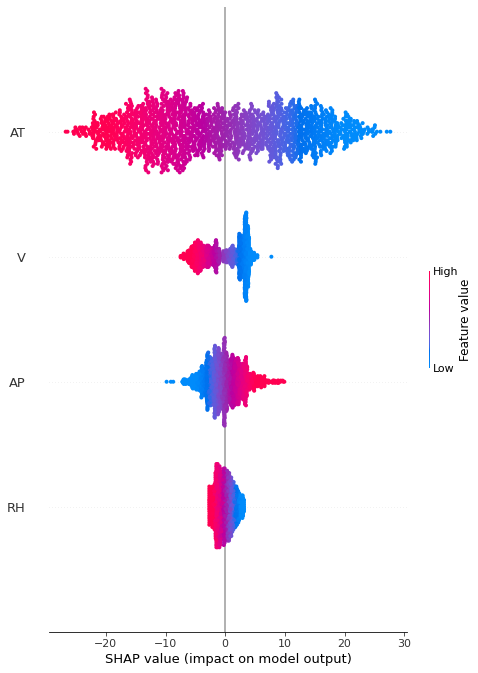

In [56]:
shap.summary_plot(shap_values[0],X_test,feature_names=features,plot_size=2.5)

## It is interesting to notice that shap values capture the correlation between features and predicted values as shown in the begining of this notebook.

In [62]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test,feature_names=features)